## Assignment 1 - Machine Learning Project
### Project 1: Classify Images of Colon Cancer
##### Group No. 3: Sheikh Abdul Munim (s4076159), Liya Benoy (s4027344)

## EDA

In [1]:
import pandas as pd
import numpy as np 
import os
import sys

In [3]:
# Load the main labels
labels_main = pd.read_csv('D:\+Masters AI\Semester_2_1\CML\Assignment-2\cml_assignment2\Image_classification_data\data_labels_extraData.csv')
labels_extra = pd.read_csv('D:\+Masters AI\Semester_2_1\CML\Assignment-2\cml_assignment2\Image_classification_data\data_labels_mainData.csv')

print(labels_main.head())

print(labels_extra.head())

   InstanceID  patientID  ImageName  isCancerous
0       12681         61  12681.png            0
1       12682         61  12682.png            0
2       12683         61  12683.png            0
3       12684         61  12684.png            0
4       12685         61  12685.png            0
   InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0


In [20]:
image_folder = 'D:\+Masters AI\Semester_2_1\CML\Assignment-2\cml_assignment2\Image_classification_data\patch_images'
images = os.listdir(image_folder)

In [8]:

print(f"Total images: {len(images)}")


Total images: 20280


In [9]:
images_set = set(images)
csv_images_set = set(labels_main['ImageName'].astype(str))  # no '.png' added!

print("Images in CSV but missing from folder:", csv_images_set - images_set)
print("Images in folder but missing from CSV:", images_set - csv_images_set)


Images in CSV but missing from folder: set()
Images in folder but missing from CSV: {'1084.png', '8397.png', '3567.png', '15753.png', '4308.png', '9411.png', '9466.png', '17009.png', '11278.png', '3309.png', '308.png', '4955.png', '4433.png', '378.png', '15707.png', '17187.png', '909.png', '12050.png', '8578.png', '17785.png', '13550.png', '190.png', '183.png', '12110.png', '20053.png', '1591.png', '19908.png', '8001.png', '11294.png', '17118.png', '1341.png', '9218.png', '17700.png', '17408.png', '18445.png', '18202.png', '65.png', '19004.png', '16654.png', '18694.png', '7861.png', '5595.png', '8020.png', '1478.png', '104.png', '22253.png', '9995.png', '4985.png', '961.png', '22295.png', '191.png', '7969.png', '341.png', '9137.png', '14039.png', '7811.png', '21137.png', '13289.png', '17177.png', '20557.png', '3576.png', '20552.png', '3096.png', '642.png', '4782.png', '3771.png', '13717.png', '10020.png', '9040.png', '9217.png', '4393.png', '16965.png', '8478.png', '4132.png', '5503.pn

In [13]:
#use only images that are listed in the CSV file
images_filtered = [img for img in images if img in csv_images_set]

In [14]:
#class distribution of the images 
print(labels_main['isCancerous'].value_counts())


isCancerous
0    7394
1    2990
Name: count, dtype: int64


<Axes: title={'center': 'Cancerous vs Non-cancerous'}, xlabel='isCancerous'>

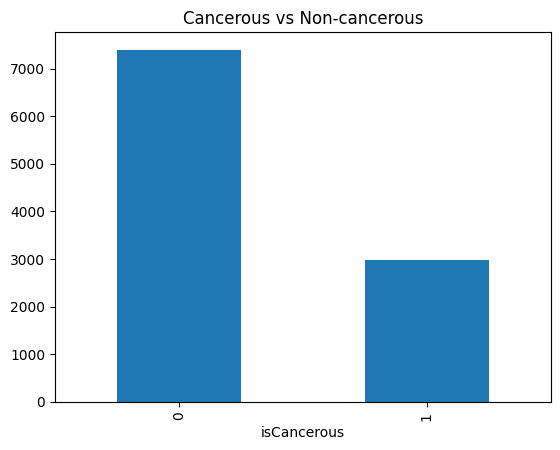

In [16]:
#plot the distribution of the classes
import matplotlib.pyplot as plt
labels_main['isCancerous'].value_counts().plot(kind='bar', title='Cancerous vs Non-cancerous')


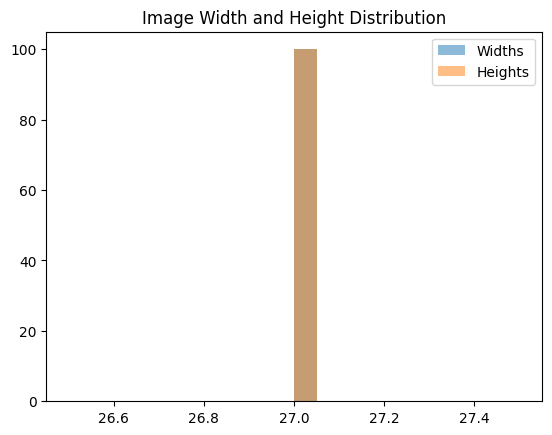

In [19]:
#images size distribution
from PIL import Image

widths, heights = [], []

for img_name in images_filtered[:100]:  # checking first 100 for speed
    img = Image.open(os.path.join(image_folder, img_name))
    widths.append(img.width)
    heights.append(img.height)

import matplotlib.pyplot as plt

plt.hist(widths, bins=20, alpha=0.5, label='Widths')
plt.hist(heights, bins=20, alpha=0.5, label='Heights')
plt.legend()
plt.title("Image Width and Height Distribution")
plt.show()


In [32]:
print(labels_main.columns)


Index(['InstanceID', 'patientID', 'ImageName', 'isCancerous'], dtype='object')


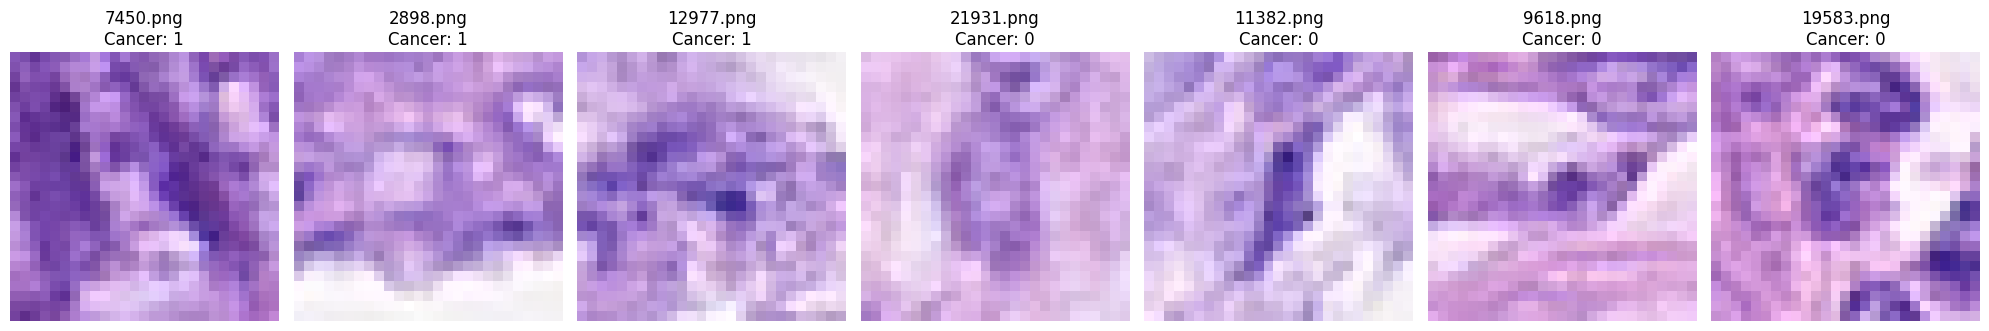

In [33]:
#Visualize some images
import os
import matplotlib.pyplot as plt
from PIL import Image

sample = labels_main.sample(7)

fig, axes = plt.subplots(1, 7, figsize=(20, 5))  # 1 row, 7 columns

for ax, (idx, row) in zip(axes, sample.iterrows()):
    img_path = os.path.join(image_folder, str(row['ImageName']))
    
    if not os.path.exists(img_path):
        print(f"Missing image: {img_path}")
        continue
    
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"{row['ImageName']}\nCancer: {row['isCancerous']}")
    ax.axis('off')

plt.tight_layout()
plt.show()



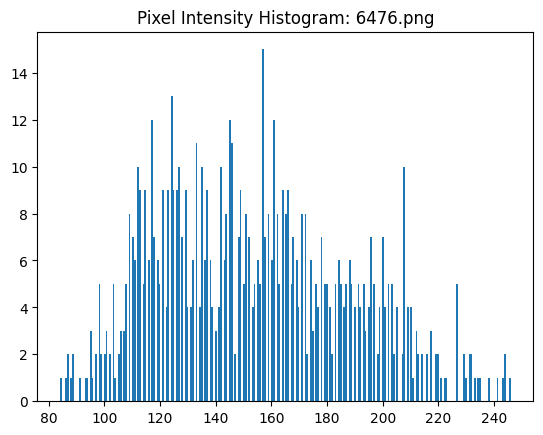

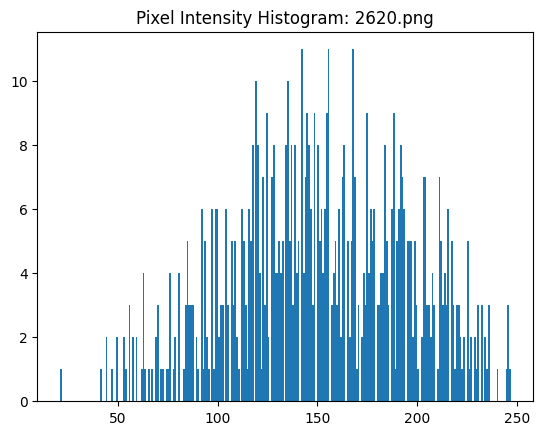

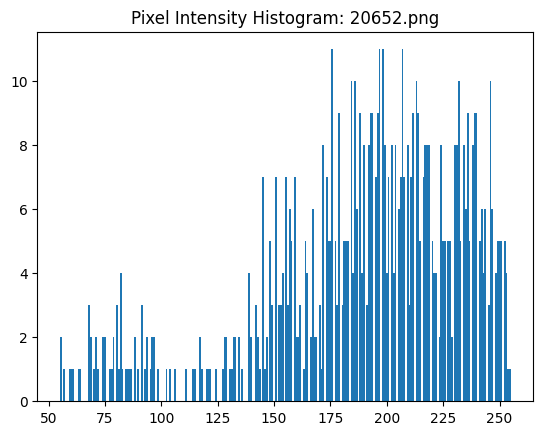

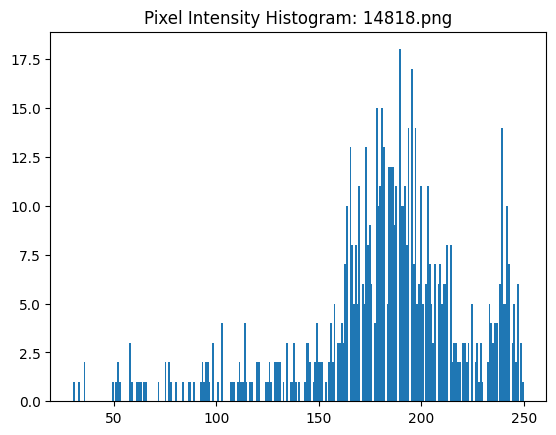

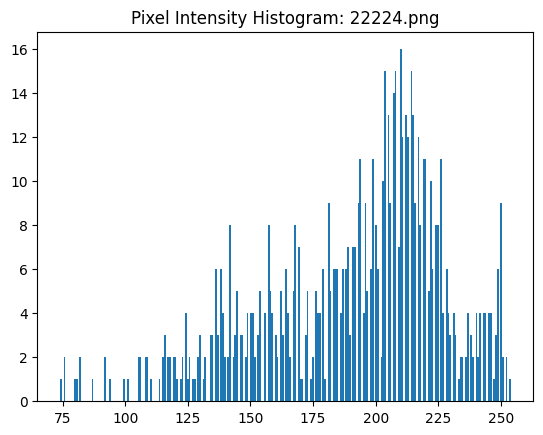

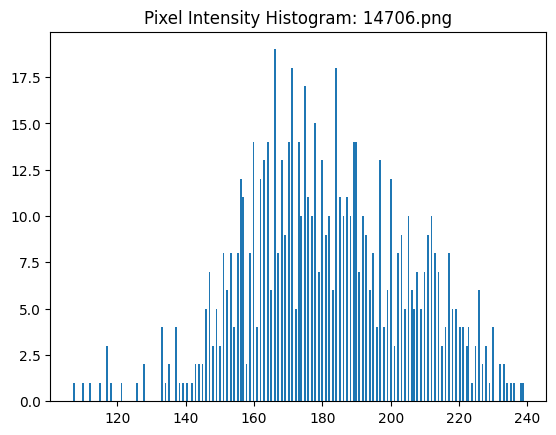

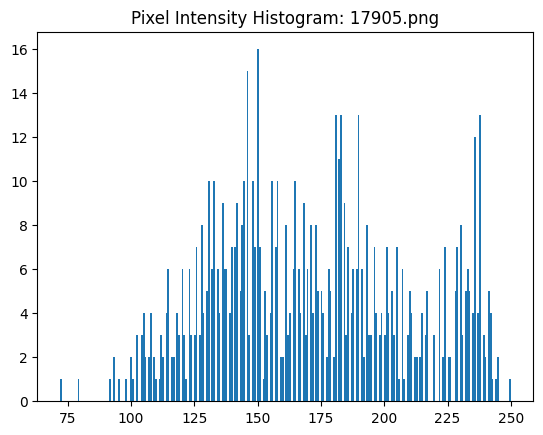

In [30]:
# Check image pixel intersity
for idx, row in sample.iterrows():
    img_path = os.path.join(image_folder, str(row['ImageName']))
    img = Image.open(img_path).convert('L')  # grayscale
    img_array = np.array(img)
    plt.hist(img_array.ravel(), bins=256)
    plt.title(f"Pixel Intensity Histogram: {row['ImageName']}")
    plt.show()


## Preprocess data